In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.4 MB/s eta 0:00:00


In [25]:
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base,creator,tools,algorithms

In [26]:
num_locations = 10
locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 3
creator.create("FitnessMin",base.Fitness,weights = (-1.0,-1.0))
creator.create("Individual",list,fitness=creator.FitnessMin)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [27]:
creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0))
creator.create("Individual",list,fitness = creator.FitnessMin)

In [28]:
toolbox = base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [29]:
def evalVRP(individual):
    # TODO: Task 3 - Write the fitness evaluation function
    # HINT: Calculate the total distance of routes and the standard deviation among the distances and return (distance, std dev)
    total_distance =0
    distances = []
    for i in range(num_vehicles):
      vehicle_route = [depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)]+[depot]
      vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1])-np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
      total_distance += vehicle_distance
      distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

In [30]:
toolbox.register("evaluate", evalVRP)
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05)
toolbox.register("mate",tools.cxPartialyMatched)


In [31]:
def plot_routes(individual,title ="Routes"):
  plt.figure()
  for(x,y) in locations:
      plt.plot(x,y,'bo')
  plt.plot(depot[0],depot[1],'rs')
  for i in range(num_vehicles):
    vehicle_route = [depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)] + [depot]
    plt.plot(depot[0],depot[1],'rs')
  for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

  plt.title(title)
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.show()

gen	nevals	avg    	min    
0  	300   	368.928	3.29525
1  	220   	354.939	1.74252
2  	240   	349.818	3.07837
3  	229   	345.312	2.05848
4  	228   	343.972	3.23812
5  	218   	338.433	8.84995
6  	220   	336.678	4.48322
7  	232   	336.887	5.59866
8  	223   	333.31 	6.516  
9  	219   	329.146	3.55635
10 	251   	330.744	3.03379
11 	221   	328.068	6.90992
12 	221   	318.838	3.76767
13 	212   	316.553	5.80922
14 	216   	312.589	3.87829
15 	222   	310.675	2.03502
16 	229   	306.487	8.11146
17 	230   	311.959	3.3754 
18 	228   	309.418	3.48953
19 	244   	303.872	2.42107
20 	223   	294.44 	8.94662
21 	222   	285.199	4.43562
22 	223   	286.342	22.3027
23 	218   	276.005	22.3027
24 	240   	272.22 	21.3798
25 	227   	268.479	11.4635
26 	235   	263.279	21.3798
27 	235   	266.076	11.4635
28 	235   	261.286	11.4635
29 	240   	263.737	20.7731
30 	235   	261.32 	28.8149
31 	232   	260.368	10.8203
32 	229   	260.867	21.3798
33 	243   	262.892	28.8149
34 	214   	262.986	25.1206
35 	234   	271.224	21.1688
3

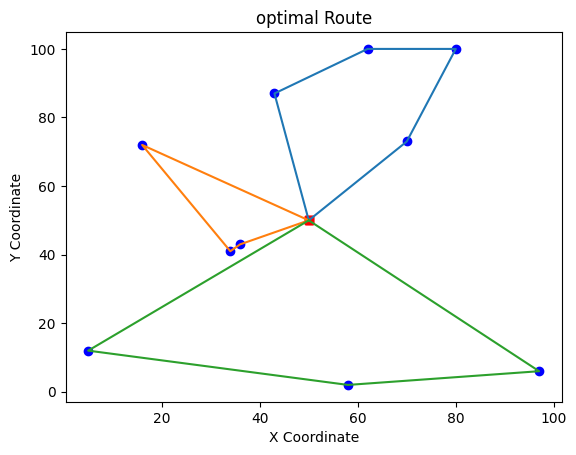

In [32]:
def main():
  random.seed(42)
  pop = toolbox.population(n=300)
  hof = tools.HallOfFame(1)

  stats = tools.Statistics(lambda ind:ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("min", np.min)

  algorithms.eaSimple(pop, toolbox, 0.7,0.2,300,stats = stats,halloffame=hof)

  plot_routes(hof[0],"optimal Route")
  return pop,stats,hof

if __name__ == "__main__":
  main()